In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
## loading the data
df = pd.read_csv("C:/Users/ammanana/Desktop/technocolabs/prosperLoanData.csv")

In [3]:
## checking starting 5 rows
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
df['year'] = df['ListingCreationDate'].str.extract('(\d+)',expand=True)

In [5]:
df['year'] = pd.to_datetime(df['year'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [7]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_CollectionFees  LP_GrossPrincipalLoss  \
0        0.1580       0.1380  ...                0.0                    0.0   
1        0.0920       0.0820  ...                0.0                    0.0   
2        0.2750       0.2400  ...                0.0                    0.0   
3        0.0974       0.0874  ...                0.0                    0.0   
4        0.2085       0.1985  ...                0.0                    0.0   

   LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments PercentFunded  \
0                  0.0                              0.0           1.0   
1                  0.0                              0.0           1.0   
2                  0.0                              0.0           1.0   
3                  0.0                              0.0           1.0   
4                  0.0                              0.0           1.0   

   Recommendations  InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
0                0                           0                         0.0   
1                0                           0                         0.0   
2                0                           0                         0.0   
3                0                           0                         0.0   
4                0                           0                         0.0   

  Investors       year  
0       258 2007-01-01  
1         1 2014-01-01  
2        41 2007-01-01  
3       158 2012-01-01  
4        20 2013-01-01  

[5 rows x 82 columns]

In [8]:
## shape of data

df.shape

(113937, 82)

In [9]:
# Duplicates data entry in loan data
df.duplicated().sum()

0

In [10]:
#checking the captalization
df['LoanStatus'].value_counts(dropna=False)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
## info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

## DATA LABELING

In [12]:
## creating target variable by status object in closeddate having nullvalue has 1 and for value we update it has 0.

df["Status"] = df["ClosedDate"].apply(lambda x: 1 if pd.isnull(x) else 0)


In [13]:
### after closeddate we will select loancurrentdaydelinquent the value with grater than 180 as 1 and less than 180 as 0.
df["Status"] = df["LoanCurrentDaysDelinquent"].apply(lambda x: 1 if x > 180 else 0)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

## Handling Missing Values

In [15]:
null_count = {}
for columns in df:
    null_count[columns] = df[columns].isnull().sum()
    

In [16]:
null_count

{'ListingKey': 0,
 'ListingNumber': 0,
 'ListingCreationDate': 0,
 'CreditGrade': 84984,
 'Term': 0,
 'LoanStatus': 0,
 'ClosedDate': 58848,
 'BorrowerAPR': 25,
 'BorrowerRate': 0,
 'LenderYield': 0,
 'EstimatedEffectiveYield': 29084,
 'EstimatedLoss': 29084,
 'EstimatedReturn': 29084,
 'ProsperRating (numeric)': 29084,
 'ProsperRating (Alpha)': 29084,
 'ProsperScore': 29084,
 'ListingCategory (numeric)': 0,
 'BorrowerState': 5515,
 'Occupation': 3588,
 'EmploymentStatus': 2255,
 'EmploymentStatusDuration': 7625,
 'IsBorrowerHomeowner': 0,
 'CurrentlyInGroup': 0,
 'GroupKey': 100596,
 'DateCreditPulled': 0,
 'CreditScoreRangeLower': 591,
 'CreditScoreRangeUpper': 591,
 'FirstRecordedCreditLine': 697,
 'CurrentCreditLines': 7604,
 'OpenCreditLines': 7604,
 'TotalCreditLinespast7years': 697,
 'OpenRevolvingAccounts': 0,
 'OpenRevolvingMonthlyPayment': 0,
 'InquiriesLast6Months': 697,
 'TotalInquiries': 1159,
 'CurrentDelinquencies': 697,
 'AmountDelinquent': 7622,
 'DelinquenciesLast7Yea

In [17]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0        0.1580       0.1380  ...                    0.0                  0.0   
1        0.0920       0.0820  ...                    0.0                  0.0   
2        0.2750       0.2400  ...                    0.0                  0.0   
3        0.0974       0.0874  ...                    0.0                  0.0   
4        0.2085       0.1985  ...                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded Recommendations  \
0                              0.0            1.0               0   
1                              0.0            1.0               0   
2                              0.0            1.0               0   
3                              0.0            1.0               0   
4                              0.0            1.0               0   

   InvestmentFromFriendsCount  InvestmentFromFriendsAmount Investors  \
0                           0                          0.0       258   
1                           0                          0.0         1   
2                           0                          0.0        41   
3                           0                          0.0       158   
4                           0                          0.0        20   

        year Status  
0 2007-01-01      0  
1 2014-01-01      0  
2 2007-01-01      0  
3 2012-01-01      0  
4 2013-01-01      0  

[5 rows x 83 columns]

In [18]:
df.drop(columns=['ListingKey','ListingCreationDate','GroupKey','LoanKey','LoanOriginationDate','LoanOriginationQuarter','MemberKey','DateCreditPulled','FirstRecordedCreditLine','ClosedDate'],axis=1,inplace=True)

In [19]:
df.head()

ListingNumber CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0         193129           C    36  Completed      0.16516        0.1580   
1        1209647         NaN    36    Current      0.12016        0.0920   
2          81716          HR    36  Completed      0.28269        0.2750   
3         658116         NaN    36    Current      0.12528        0.0974   
4         909464         NaN    36    Current      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ...  \
0       0.1380                      NaN            NaN              NaN  ...   
1       0.0820                  0.07960         0.0249          0.05470  ...   
2       0.2400                      NaN            NaN              NaN  ...   
3       0.0874                  0.08490         0.0249          0.06000  ...   
4       0.1985                  0.18316         0.0925          0.09066  ...   

   LP_GrossPrincipalLoss LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments  \
0                    0.0                 0.0                              0.0   
1                    0.0                 0.0                              0.0   
2                    0.0                 0.0                              0.0   
3                    0.0                 0.0                              0.0   
4                    0.0                 0.0                              0.0   

   PercentFunded Recommendations InvestmentFromFriendsCount  \
0            1.0               0                          0   
1            1.0               0                          0   
2            1.0               0                          0   
3            1.0               0                          0   
4            1.0               0                          0   

  InvestmentFromFriendsAmount  Investors       year  Status  
0                         0.0        258 2007-01-01       0  
1                         0.0          1 2014-01-01       0  
2                         0.0         41 2007-01-01       0  
3                         0.0        158 2012-01-01       0  
4                         0.0         20 2013-01-01       0  

[5 rows x 73 columns]

### Categorical Data

In [20]:
categorical_data = df.select_dtypes("object")
categorical_data.head()

CreditGrade LoanStatus ProsperRating (Alpha) BorrowerState     Occupation  \
0           C  Completed                   NaN            CO          Other   
1         NaN    Current                     A            CO   Professional   
2          HR  Completed                   NaN            GA          Other   
3         NaN    Current                     A            GA  Skilled Labor   
4         NaN    Current                     D            MN      Executive   

  EmploymentStatus     IncomeRange  
0    Self-employed  $25,000-49,999  
1         Employed  $50,000-74,999  
2    Not available   Not displayed  
3         Employed  $25,000-49,999  
4         Employed       $100,000+

In [21]:
categorical_data.isnull().sum()

CreditGrade              84984
LoanStatus                   0
ProsperRating (Alpha)    29084
BorrowerState             5515
Occupation                3588
EmploymentStatus          2255
IncomeRange                  0
dtype: int64

In [22]:
categorical_data['CreditGrade'].fillna("not available",inplace=True)
categorical_data['ProsperRating (Alpha)'].fillna("not available",inplace=True)
categorical_data['BorrowerState'] = categorical_data['BorrowerState'].fillna(categorical_data['BorrowerState'].mode().iloc[0])
categorical_data['Occupation'] = categorical_data['Occupation'].fillna(categorical_data['Occupation'].mode().iloc[0])
categorical_data['EmploymentStatus'] = categorical_data['EmploymentStatus'].fillna(categorical_data['EmploymentStatus'].mode().iloc[0])

In [23]:
categorical_data.isnull().sum()

CreditGrade              0
LoanStatus               0
ProsperRating (Alpha)    0
BorrowerState            0
Occupation               0
EmploymentStatus         0
IncomeRange              0
dtype: int64

### Numerical Data

In [24]:
numerical_data_int = df.select_dtypes(["int"])
numerical_data_int.head()

ListingNumber  Term  ListingCategory (numeric)  OpenRevolvingAccounts  \
0         193129    36                          0                      1   
1        1209647    36                          2                     13   
2          81716    36                          0                      0   
3         658116    36                         16                      7   
4         909464    36                          2                      6   

   LoanCurrentDaysDelinquent  LoanMonthsSinceOrigination  LoanNumber  \
0                          0                          78       19141   
1                          0                           0      134815   
2                          0                          86        6466   
3                          0                          16       77296   
4                          0                           6      102670   

   LoanOriginalAmount  Recommendations  InvestmentFromFriendsCount  Investors  \
0                9425                0                           0        258   
1               10000                0                           0          1   
2                3001                0                           0         41   
3               10000                0                           0        158   
4               15000                0                           0         20   

   Status  
0       0  
1       0  
2       0  
3       0  
4       0

In [25]:
numerical_data_int.isnull().sum()

ListingNumber                 0
Term                          0
ListingCategory (numeric)     0
OpenRevolvingAccounts         0
LoanCurrentDaysDelinquent     0
LoanMonthsSinceOrigination    0
LoanNumber                    0
LoanOriginalAmount            0
Recommendations               0
InvestmentFromFriendsCount    0
Investors                     0
Status                        0
dtype: int64

In [26]:
numerical_data_float = df.select_dtypes(["float"])
numerical_data_float.head()

BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                      NaN   
1      0.12016        0.0920       0.0820                  0.07960   
2      0.28269        0.2750       0.2400                      NaN   
3      0.12528        0.0974       0.0874                  0.08490   
4      0.24614        0.2085       0.1985                  0.18316   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  \
0            NaN              NaN                      NaN           NaN   
1         0.0249          0.05470                      6.0           7.0   
2            NaN              NaN                      NaN           NaN   
3         0.0249          0.06000                      6.0           9.0   
4         0.0925          0.09066                      3.0           4.0   

   EmploymentStatusDuration  CreditScoreRangeLower  ...  LP_CustomerPayments  \
0                       2.0                  640.0  ...             11396.14   
1                      44.0                  680.0  ...                 0.00   
2                       NaN                  480.0  ...              4186.63   
3                     113.0                  800.0  ...              5143.20   
4                      44.0                  680.0  ...              2819.85   

   LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  \
0                       9425.00             1971.14         -133.18   
1                          0.00                0.00            0.00   
2                       3001.00             1185.63          -24.20   
3                       4091.09             1052.11         -108.01   
4                       1563.22             1256.63          -60.27   

   LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                0.0                    0.0                  0.0   
1                0.0                    0.0                  0.0   
2                0.0                    0.0                  0.0   
3                0.0                    0.0                  0.0   
4                0.0                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  InvestmentFromFriendsAmount  
0                              0.0            1.0                          0.0  
1                              0.0            1.0                          0.0  
2                              0.0            1.0                          0.0  
3                              0.0            1.0                          0.0  
4                              0.0            1.0                          0.0  

[5 rows x 50 columns]

In [27]:
numerical_data_float['ProsperRating (numeric)'].fillna(0.0,inplace=True)
numerical_data_float['ProsperScore'].fillna(0.0,inplace=True)
numerical_data_float['CreditScoreRangeLower'].fillna(0.0,inplace=True)
numerical_data_float['CurrentCreditLines'].fillna(0.0,inplace=True)
numerical_data_float['OpenCreditLines'].fillna(0.0,inplace=True)
numerical_data_float['TotalCreditLinespast7years'].fillna(0.0,inplace=True)
numerical_data_float['InquiriesLast6Months'].fillna(0.0,inplace=True)
numerical_data_float['TotalInquiries'].fillna(0.0,inplace=True)
numerical_data_float['CurrentDelinquencies'].fillna(0.0,inplace=True)
numerical_data_float['AmountDelinquent'].fillna(0.0,inplace=True)
numerical_data_float['DelinquenciesLast7Years'].fillna(0.0,inplace=True)
numerical_data_float['PublicRecordsLast10Years'].fillna(0.0,inplace=True)
numerical_data_float['PublicRecordsLast12Months'].fillna(0.0,inplace=True)
numerical_data_float['RevolvingCreditBalance'].fillna(0.0,inplace=True)
numerical_data_float['BankcardUtilization'].fillna(0.0,inplace=True)
numerical_data_float['AvailableBankcardCredit'].fillna(0.0,inplace=True)
numerical_data_float['TotalTrades'].fillna(0.0,inplace=True)
numerical_data_float['TradesOpenedLast6Months'].fillna(0.0,inplace=True)
numerical_data_float['DebtToIncomeRatio'].fillna(0.0,inplace=True)

In [28]:
numerical_data_float.isnull().sum()

BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                    0
ProsperScore                               0
EmploymentStatusDuration                7625
CreditScoreRangeLower                      0
CreditScoreRangeUpper                    591
CurrentCreditLines                         0
OpenCreditLines                            0
TotalCreditLinespast7years                 0
OpenRevolvingMonthlyPayment                0
InquiriesLast6Months                       0
TotalInquiries                             0
CurrentDelinquencies                       0
AmountDelinquent                           0
DelinquenciesLast7Years                    0
PublicRecordsLast10Years                   0
PublicRecordsLast12Months                  0
RevolvingC

In [29]:
numerical_data_float = numerical_data_float.fillna(numerical_data_float.mean())

In [30]:
numerical_data_float.head()

BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
0      0.16516        0.1580       0.1380                 0.168661   
1      0.12016        0.0920       0.0820                 0.079600   
2      0.28269        0.2750       0.2400                 0.168661   
3      0.12528        0.0974       0.0874                 0.084900   
4      0.24614        0.2085       0.1985                 0.183160   

   EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  \
0       0.080306         0.096068                      0.0           0.0   
1       0.024900         0.054700                      6.0           7.0   
2       0.080306         0.096068                      0.0           0.0   
3       0.024900         0.060000                      6.0           9.0   
4       0.092500         0.090660                      3.0           4.0   

   EmploymentStatusDuration  CreditScoreRangeLower  ...  LP_CustomerPayments  \
0                  2.000000                  640.0  ...             11396.14   
1                 44.000000                  680.0  ...                 0.00   
2                 96.071582                  480.0  ...              4186.63   
3                113.000000                  800.0  ...              5143.20   
4                 44.000000                  680.0  ...              2819.85   

   LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  \
0                       9425.00             1971.14         -133.18   
1                          0.00                0.00            0.00   
2                       3001.00             1185.63          -24.20   
3                       4091.09             1052.11         -108.01   
4                       1563.22             1256.63          -60.27   

   LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                0.0                    0.0                  0.0   
1                0.0                    0.0                  0.0   
2                0.0                    0.0                  0.0   
3                0.0                    0.0                  0.0   
4                0.0                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  InvestmentFromFriendsAmount  
0                              0.0            1.0                          0.0  
1                              0.0            1.0                          0.0  
2                              0.0            1.0                          0.0  
3                              0.0            1.0                          0.0  
4                              0.0            1.0                          0.0  

[5 rows x 50 columns]

In [31]:
numerical_data_float.isnull().sum()

BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLast12Months              0
RevolvingCreditBalance                 0
BankcardUtilization                    0
AvailableBankcar

In [32]:
date_time = df.select_dtypes(["datetime"])
date_time.head()

year
0 2007-01-01
1 2014-01-01
2 2007-01-01
3 2012-01-01
4 2013-01-01

In [33]:
##concatnating the data

data = pd.concat([categorical_data,numerical_data_int,numerical_data_float,date_time],axis=1)

In [34]:
data.head()

CreditGrade LoanStatus ProsperRating (Alpha) BorrowerState  \
0              C  Completed         not available            CO   
1  not available    Current                     A            CO   
2             HR  Completed         not available            GA   
3  not available    Current                     A            GA   
4  not available    Current                     D            MN   

      Occupation EmploymentStatus     IncomeRange  ListingNumber  Term  \
0          Other    Self-employed  $25,000-49,999         193129    36   
1   Professional         Employed  $50,000-74,999        1209647    36   
2          Other    Not available   Not displayed          81716    36   
3  Skilled Labor         Employed  $25,000-49,999         658116    36   
4      Executive         Employed       $100,000+         909464    36   

   ListingCategory (numeric)  ...  LP_CustomerPrincipalPayments  \
0                          0  ...                       9425.00   
1                          2  ...                          0.00   
2                          0  ...                       3001.00   
3                         16  ...                       4091.09   
4                          2  ...                       1563.22   

   LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0             1971.14         -133.18                0.0   
1                0.00            0.00                0.0   
2             1185.63          -24.20                0.0   
3             1052.11         -108.01                0.0   
4             1256.63          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                    0.0                  0.0   
1                    0.0                  0.0   
2                    0.0                  0.0   
3                    0.0                  0.0   
4                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  \
0                              0.0            1.0   
1                              0.0            1.0   
2                              0.0            1.0   
3                              0.0            1.0   
4                              0.0            1.0   

   InvestmentFromFriendsAmount       year  
0                          0.0 2007-01-01  
1                          0.0 2014-01-01  
2                          0.0 2007-01-01  
3                          0.0 2012-01-01  
4                          0.0 2013-01-01  

[5 rows x 70 columns]

In [35]:
data.shape

(113937, 70)

In [36]:
count_data = {}
for columns in data:
    count_data[columns] = data[columns].isnull().sum()

print(count_data)    

{'CreditGrade': 0, 'LoanStatus': 0, 'ProsperRating (Alpha)': 0, 'BorrowerState': 0, 'Occupation': 0, 'EmploymentStatus': 0, 'IncomeRange': 0, 'ListingNumber': 0, 'Term': 0, 'ListingCategory (numeric)': 0, 'OpenRevolvingAccounts': 0, 'LoanCurrentDaysDelinquent': 0, 'LoanMonthsSinceOrigination': 0, 'LoanNumber': 0, 'LoanOriginalAmount': 0, 'Recommendations': 0, 'InvestmentFromFriendsCount': 0, 'Investors': 0, 'Status': 0, 'BorrowerAPR': 0, 'BorrowerRate': 0, 'LenderYield': 0, 'EstimatedEffectiveYield': 0, 'EstimatedLoss': 0, 'EstimatedReturn': 0, 'ProsperRating (numeric)': 0, 'ProsperScore': 0, 'EmploymentStatusDuration': 0, 'CreditScoreRangeLower': 0, 'CreditScoreRangeUpper': 0, 'CurrentCreditLines': 0, 'OpenCreditLines': 0, 'TotalCreditLinespast7years': 0, 'OpenRevolvingMonthlyPayment': 0, 'InquiriesLast6Months': 0, 'TotalInquiries': 0, 'CurrentDelinquencies': 0, 'AmountDelinquent': 0, 'DelinquenciesLast7Years': 0, 'PublicRecordsLast10Years': 0, 'PublicRecordsLast12Months': 0, 'Revolvi

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   CreditGrade                          113937 non-null  object        
 1   LoanStatus                           113937 non-null  object        
 2   ProsperRating (Alpha)                113937 non-null  object        
 3   BorrowerState                        113937 non-null  object        
 4   Occupation                           113937 non-null  object        
 5   EmploymentStatus                     113937 non-null  object        
 6   IncomeRange                          113937 non-null  object        
 7   ListingNumber                        113937 non-null  int64         
 8   Term                                 113937 non-null  int64         
 9   ListingCategory (numeric)            113937 non-null  int64         
 

In [38]:
data_viz = data.copy()

In [39]:
data_viz.head()

CreditGrade LoanStatus ProsperRating (Alpha) BorrowerState  \
0              C  Completed         not available            CO   
1  not available    Current                     A            CO   
2             HR  Completed         not available            GA   
3  not available    Current                     A            GA   
4  not available    Current                     D            MN   

      Occupation EmploymentStatus     IncomeRange  ListingNumber  Term  \
0          Other    Self-employed  $25,000-49,999         193129    36   
1   Professional         Employed  $50,000-74,999        1209647    36   
2          Other    Not available   Not displayed          81716    36   
3  Skilled Labor         Employed  $25,000-49,999         658116    36   
4      Executive         Employed       $100,000+         909464    36   

   ListingCategory (numeric)  ...  LP_CustomerPrincipalPayments  \
0                          0  ...                       9425.00   
1                          2  ...                          0.00   
2                          0  ...                       3001.00   
3                         16  ...                       4091.09   
4                          2  ...                       1563.22   

   LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0             1971.14         -133.18                0.0   
1                0.00            0.00                0.0   
2             1185.63          -24.20                0.0   
3             1052.11         -108.01                0.0   
4             1256.63          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                    0.0                  0.0   
1                    0.0                  0.0   
2                    0.0                  0.0   
3                    0.0                  0.0   
4                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  \
0                              0.0            1.0   
1                              0.0            1.0   
2                              0.0            1.0   
3                              0.0            1.0   
4                              0.0            1.0   

   InvestmentFromFriendsAmount       year  
0                          0.0 2007-01-01  
1                          0.0 2014-01-01  
2                          0.0 2007-01-01  
3                          0.0 2012-01-01  
4                          0.0 2013-01-01  

[5 rows x 70 columns]

## Data Visulization

In [40]:
data_viz.head()

CreditGrade LoanStatus ProsperRating (Alpha) BorrowerState  \
0              C  Completed         not available            CO   
1  not available    Current                     A            CO   
2             HR  Completed         not available            GA   
3  not available    Current                     A            GA   
4  not available    Current                     D            MN   

      Occupation EmploymentStatus     IncomeRange  ListingNumber  Term  \
0          Other    Self-employed  $25,000-49,999         193129    36   
1   Professional         Employed  $50,000-74,999        1209647    36   
2          Other    Not available   Not displayed          81716    36   
3  Skilled Labor         Employed  $25,000-49,999         658116    36   
4      Executive         Employed       $100,000+         909464    36   

   ListingCategory (numeric)  ...  LP_CustomerPrincipalPayments  \
0                          0  ...                       9425.00   
1                          2  ...                          0.00   
2                          0  ...                       3001.00   
3                         16  ...                       4091.09   
4                          2  ...                       1563.22   

   LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0             1971.14         -133.18                0.0   
1                0.00            0.00                0.0   
2             1185.63          -24.20                0.0   
3             1052.11         -108.01                0.0   
4             1256.63          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                    0.0                  0.0   
1                    0.0                  0.0   
2                    0.0                  0.0   
3                    0.0                  0.0   
4                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  \
0                              0.0            1.0   
1                              0.0            1.0   
2                              0.0            1.0   
3                              0.0            1.0   
4                              0.0            1.0   

   InvestmentFromFriendsAmount       year  
0                          0.0 2007-01-01  
1                          0.0 2014-01-01  
2                          0.0 2007-01-01  
3                          0.0 2012-01-01  
4                          0.0 2013-01-01  

[5 rows x 70 columns]

In [41]:
data_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   CreditGrade                          113937 non-null  object        
 1   LoanStatus                           113937 non-null  object        
 2   ProsperRating (Alpha)                113937 non-null  object        
 3   BorrowerState                        113937 non-null  object        
 4   Occupation                           113937 non-null  object        
 5   EmploymentStatus                     113937 non-null  object        
 6   IncomeRange                          113937 non-null  object        
 7   ListingNumber                        113937 non-null  int64         
 8   Term                                 113937 non-null  int64         
 9   ListingCategory (numeric)            113937 non-null  int64         
 

## Uni-variant Analysis

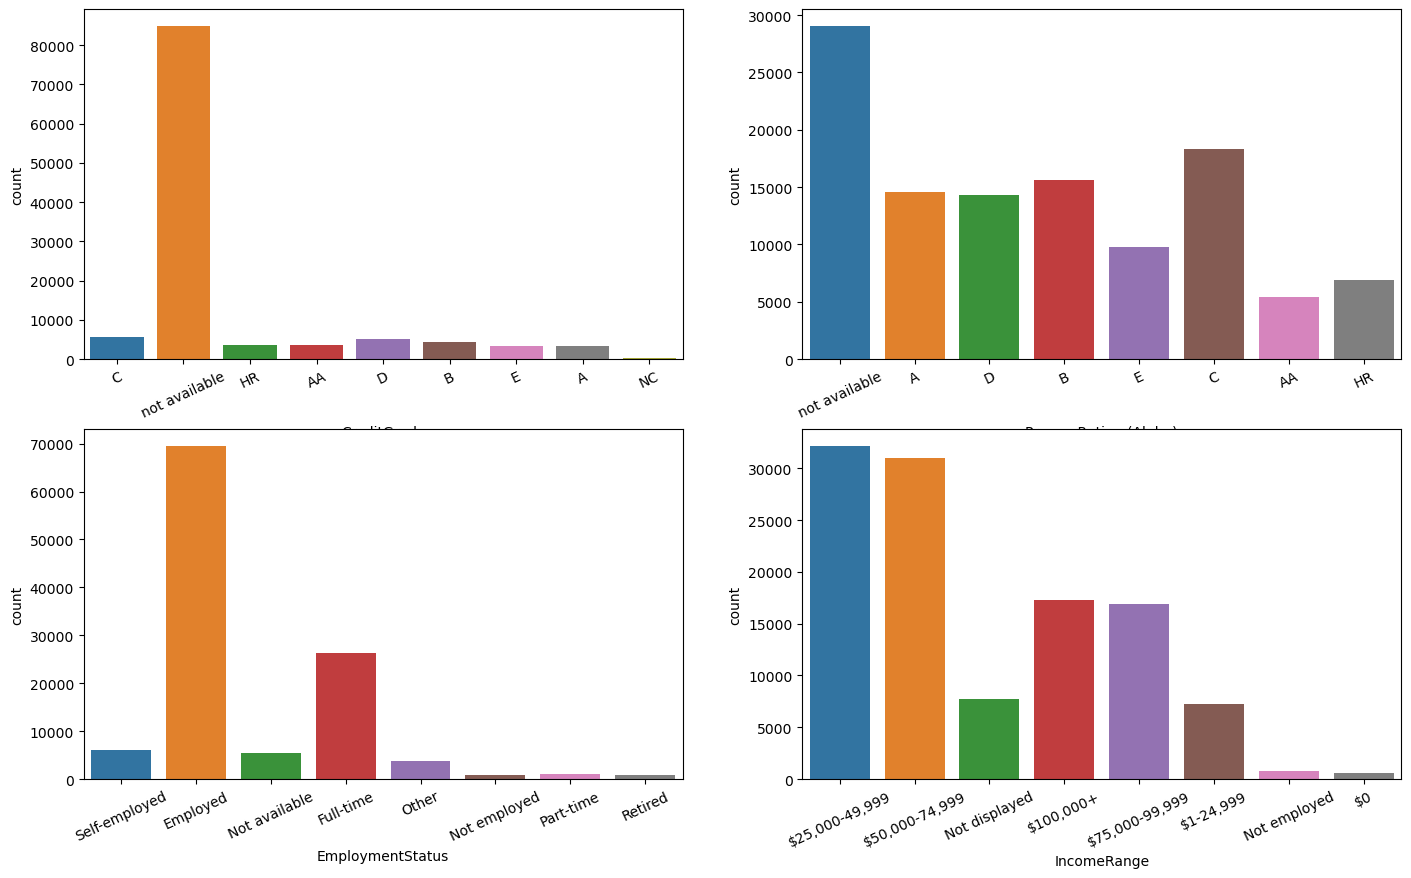

In [42]:
columns=['CreditGrade','ProsperRating (Alpha)','EmploymentStatus','IncomeRange']

plt.figure(figsize=(17,10))

for i,j in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data_viz[j])
    plt.xticks(rotation=25)

- CreditGrade is C for most of the loan persons.
- IncomeRange for 25000 to 49999 are applying for loans
- employed persons are more applying for loans.

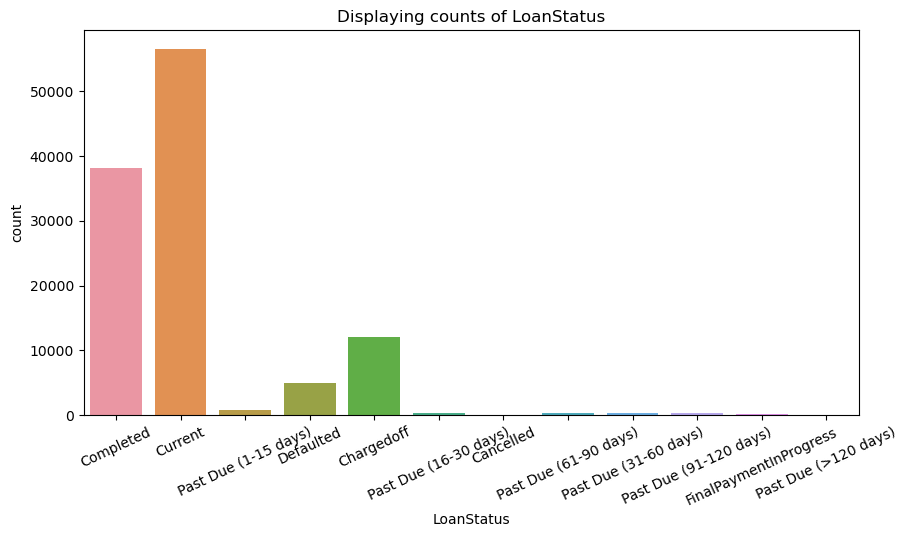

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='LoanStatus',data=data_viz)
plt.xticks(rotation=25)
plt.title('Displaying counts of LoanStatus');

- Most of the loans are in current status.

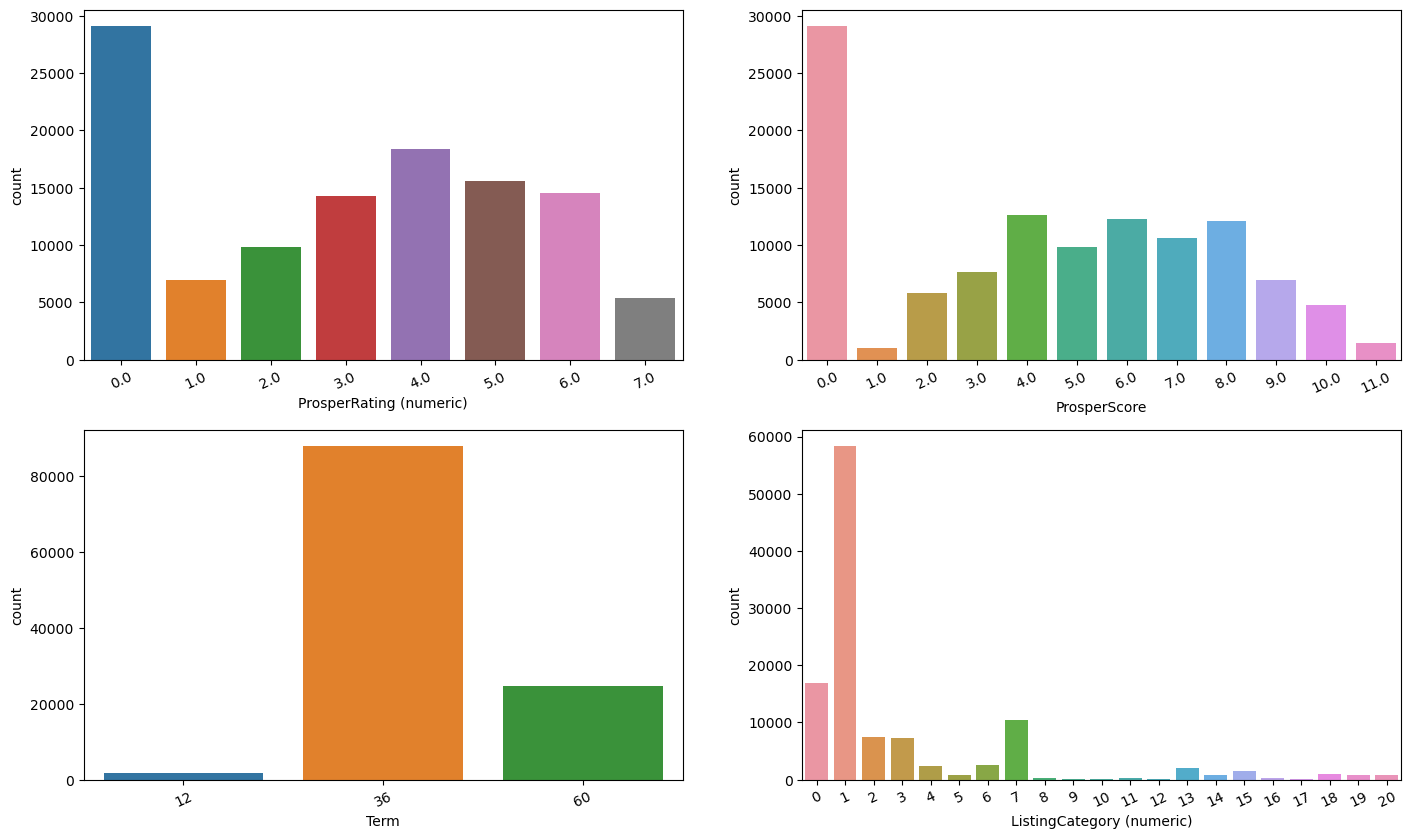

In [44]:
columns=['ProsperRating (numeric)','ProsperScore','Term','ListingCategory (numeric)']

plt.figure(figsize=(17,10))

for i,j in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data_viz[j])
    plt.xticks(rotation=25)

- Most of the prosperRating is 4.
- most of the people taking the loans having score is 4,8 and 6.
- most term is 36 months.
- most listingcategory is 1.

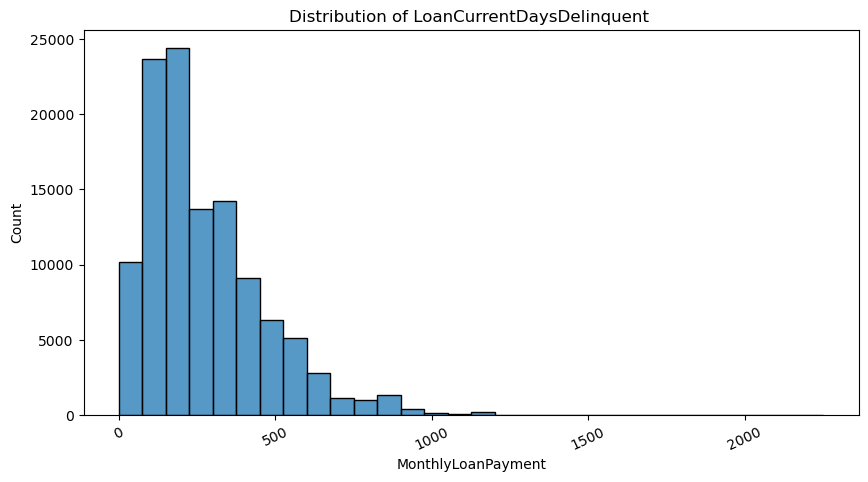

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data_viz['MonthlyLoanPayment'],bins=30,kde=False)
plt.xticks(rotation=25)
plt.title('Distribution of LoanCurrentDaysDelinquent ');

- From the histogram I found that most of Prosper loan are less than  1,000 ($)

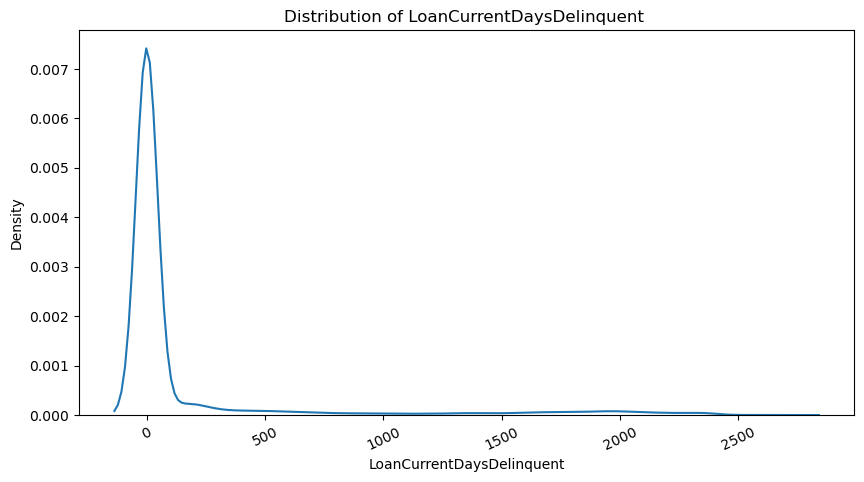

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='LoanCurrentDaysDelinquent',data=data_viz)
plt.xticks(rotation=25)
plt.title('Distribution of LoanCurrentDaysDelinquent ');

- Most of the LoanCurrentDaysDelinquent is range between 0 to 500. 
- It is right tailed to 2500.so some people are delinquent to 2500days.


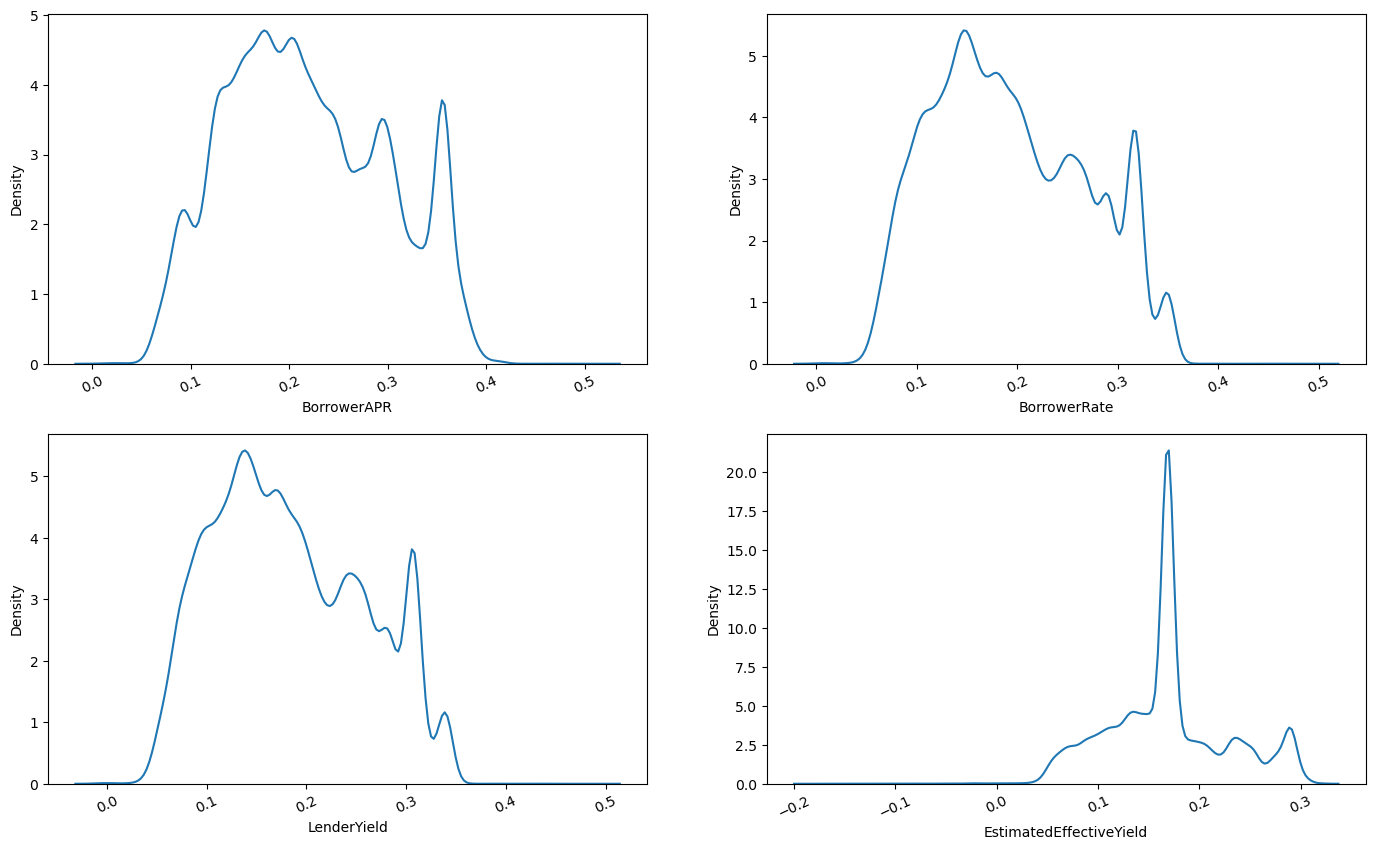

In [47]:
columns=['BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield']

plt.figure(figsize=(17,10))

for i,j in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=data_viz[j])
    plt.xticks(rotation=25)

- BorrowerApr having more dense in between 0.1 to 0.4
- LenderYield and BorrwerRate has following same distribution.
- EstimatedEffectiveYield has range between 0.0 to 0.3. 

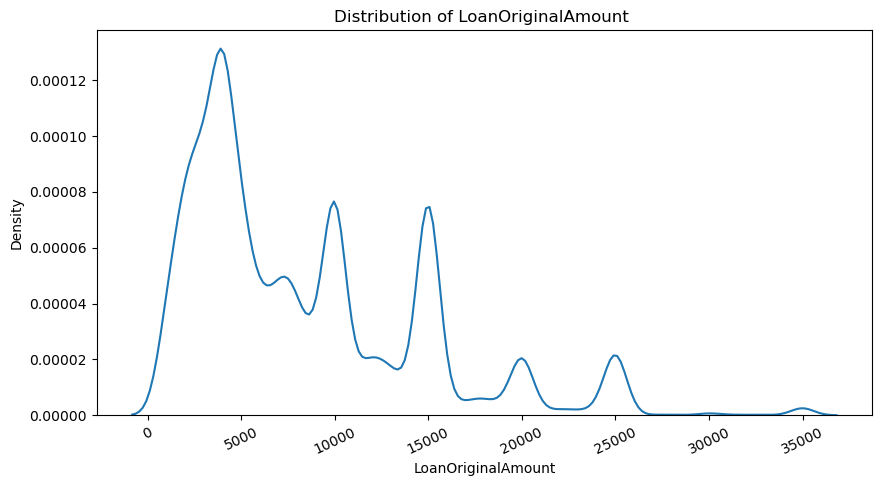

In [48]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='LoanOriginalAmount',data=data_viz)
plt.xticks(rotation=25)
plt.title('Distribution of LoanOriginalAmount ');

- LoanOriginalAmount more  ranges in between 0 to 15000. 

##  Bi-variant Analayis

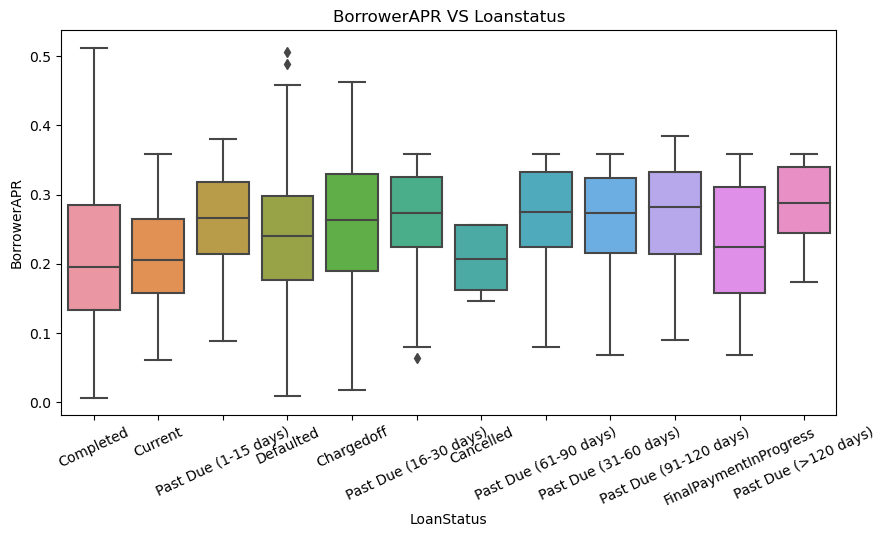

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanStatus',y='BorrowerAPR',data=data_viz)
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS Loanstatus');

- The Completed status having the highest interest rate.


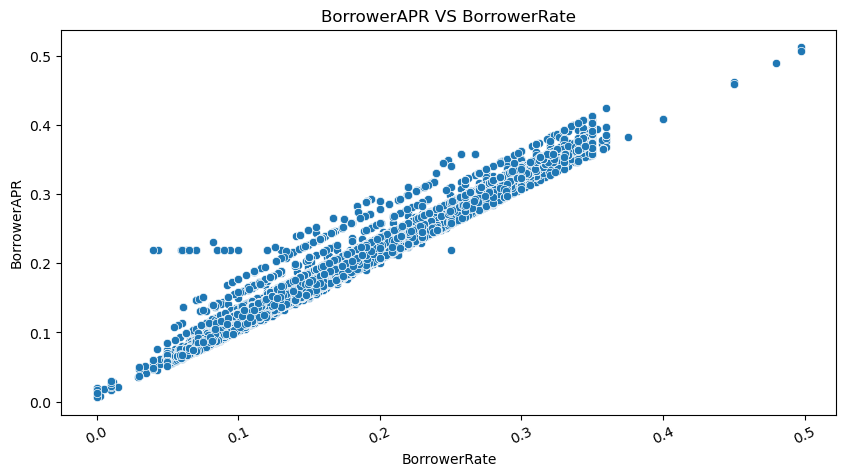

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BorrowerRate',y='BorrowerAPR',data=data_viz)
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS BorrowerRate');

- Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR than Borrower Rate will also increase and vice-versa.
- Borrower Rate and Borrower Apr having positive correlation.

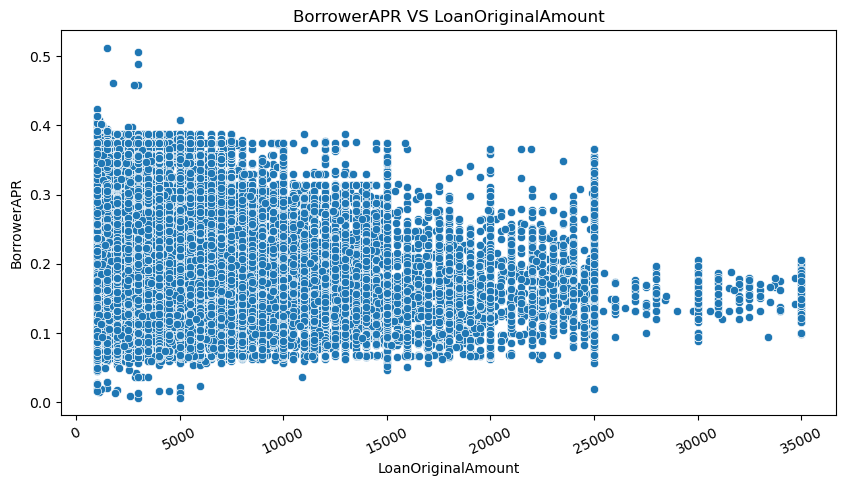

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='LoanOriginalAmount',y='BorrowerAPR',data=data_viz)
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS LoanOriginalAmount');

- short loan having the highest interest rate 
- 0 to 10000 loanamount having the highest interest rate.
- For High loanamount having the less interest rate.

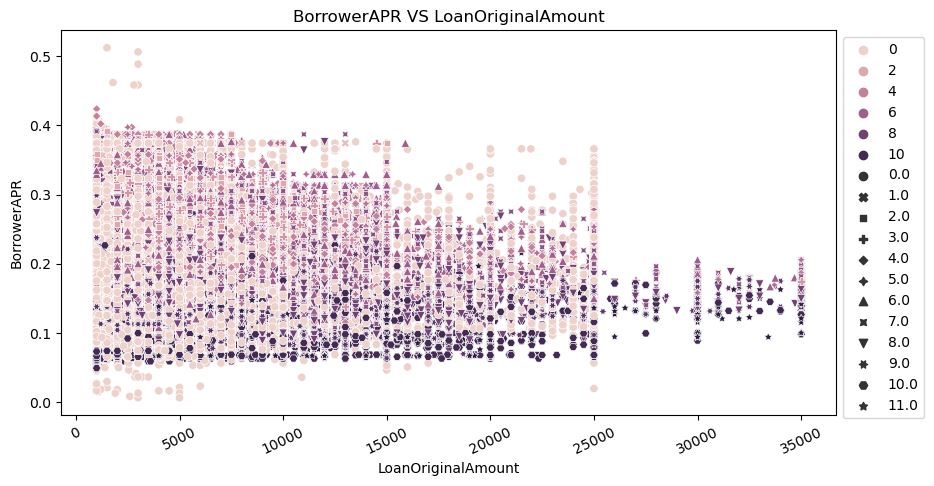

In [52]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='LoanOriginalAmount',y='BorrowerAPR',hue='ProsperScore',style='ProsperScore',data=data_viz)
ax.legend(loc=0,bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS LoanOriginalAmount');

- The loanoriginal amount in range between 25000 to 35000 there prosperscore was good.
- The prosperscore plays an important role in loanoriginal amount and BorrowerApr
- The prosperscore for 11,10,8,9,7 are getting high loans and borrowerApr is less.

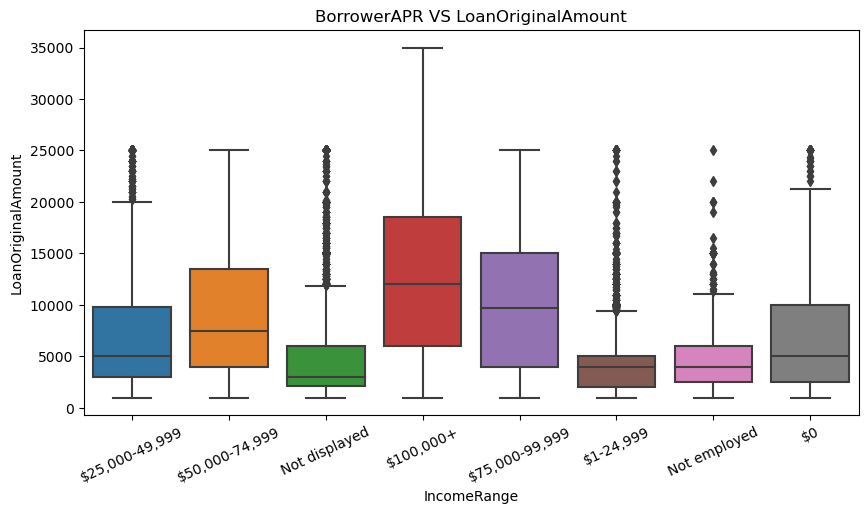

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='IncomeRange',y='LoanOriginalAmount',data=data_viz)
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS LoanOriginalAmount')
plt.show()

- The IncomeRange 100000+ are taking huge amount of loan.

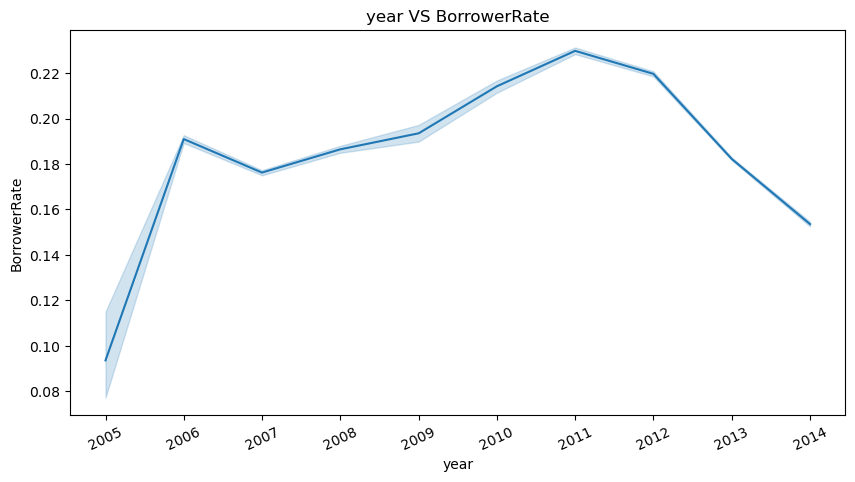

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='BorrowerRate',data=data_viz)
plt.xticks(rotation=25)
plt.title('year VS BorrowerRate')
plt.show()

- Year are getting increase the borrowerRate are getting increases.
- 2010,2011 and 2012 are borrowerRate is more.

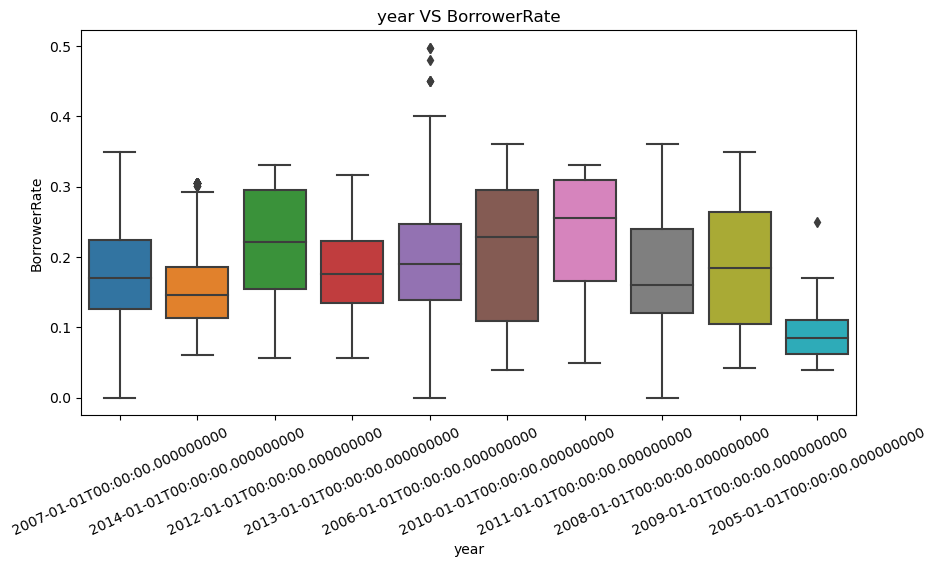

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year',y='BorrowerRate',data=data_viz)
plt.xticks(rotation=25)
plt.title('year VS BorrowerRate')
plt.show()

- In 2013 the interest rate are high.

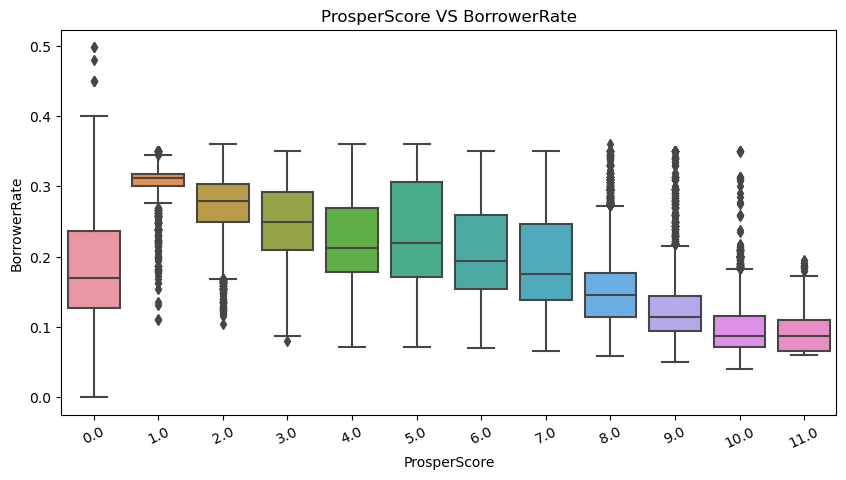

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ProsperScore',y='BorrowerRate',data=data_viz)
plt.xticks(rotation=25)
plt.title('ProsperScore VS BorrowerRate')
plt.show()

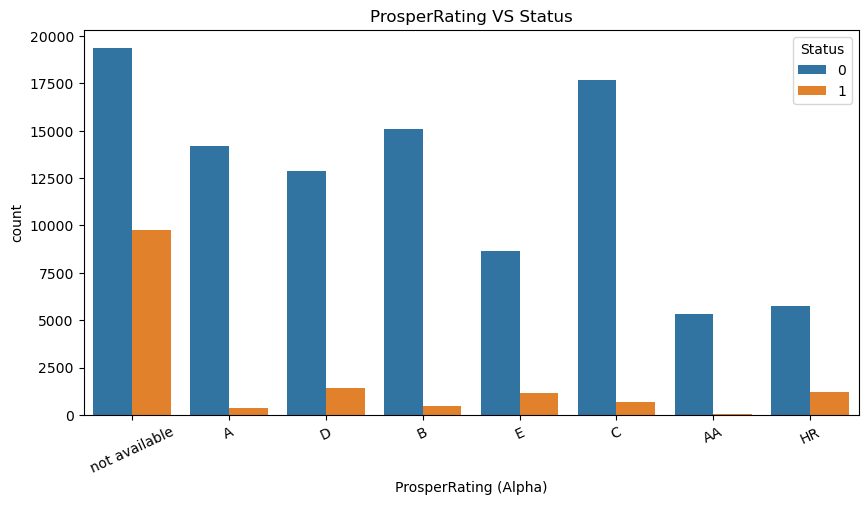

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='ProsperRating (Alpha)',data=data_viz,hue='Status')
plt.xticks(rotation=25)
plt.title('ProsperRating VS Status')
plt.show()

- The ProsperRating A and AA are making less default of loans.

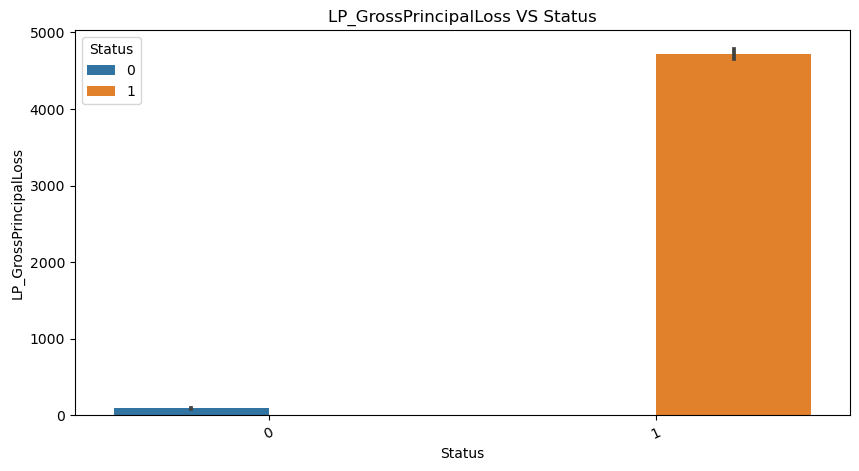

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='Status',y='LP_GrossPrincipalLoss',data=data_viz,hue='Status')
plt.xticks(rotation=25)
plt.title('LP_GrossPrincipalLoss VS Status')
plt.show()

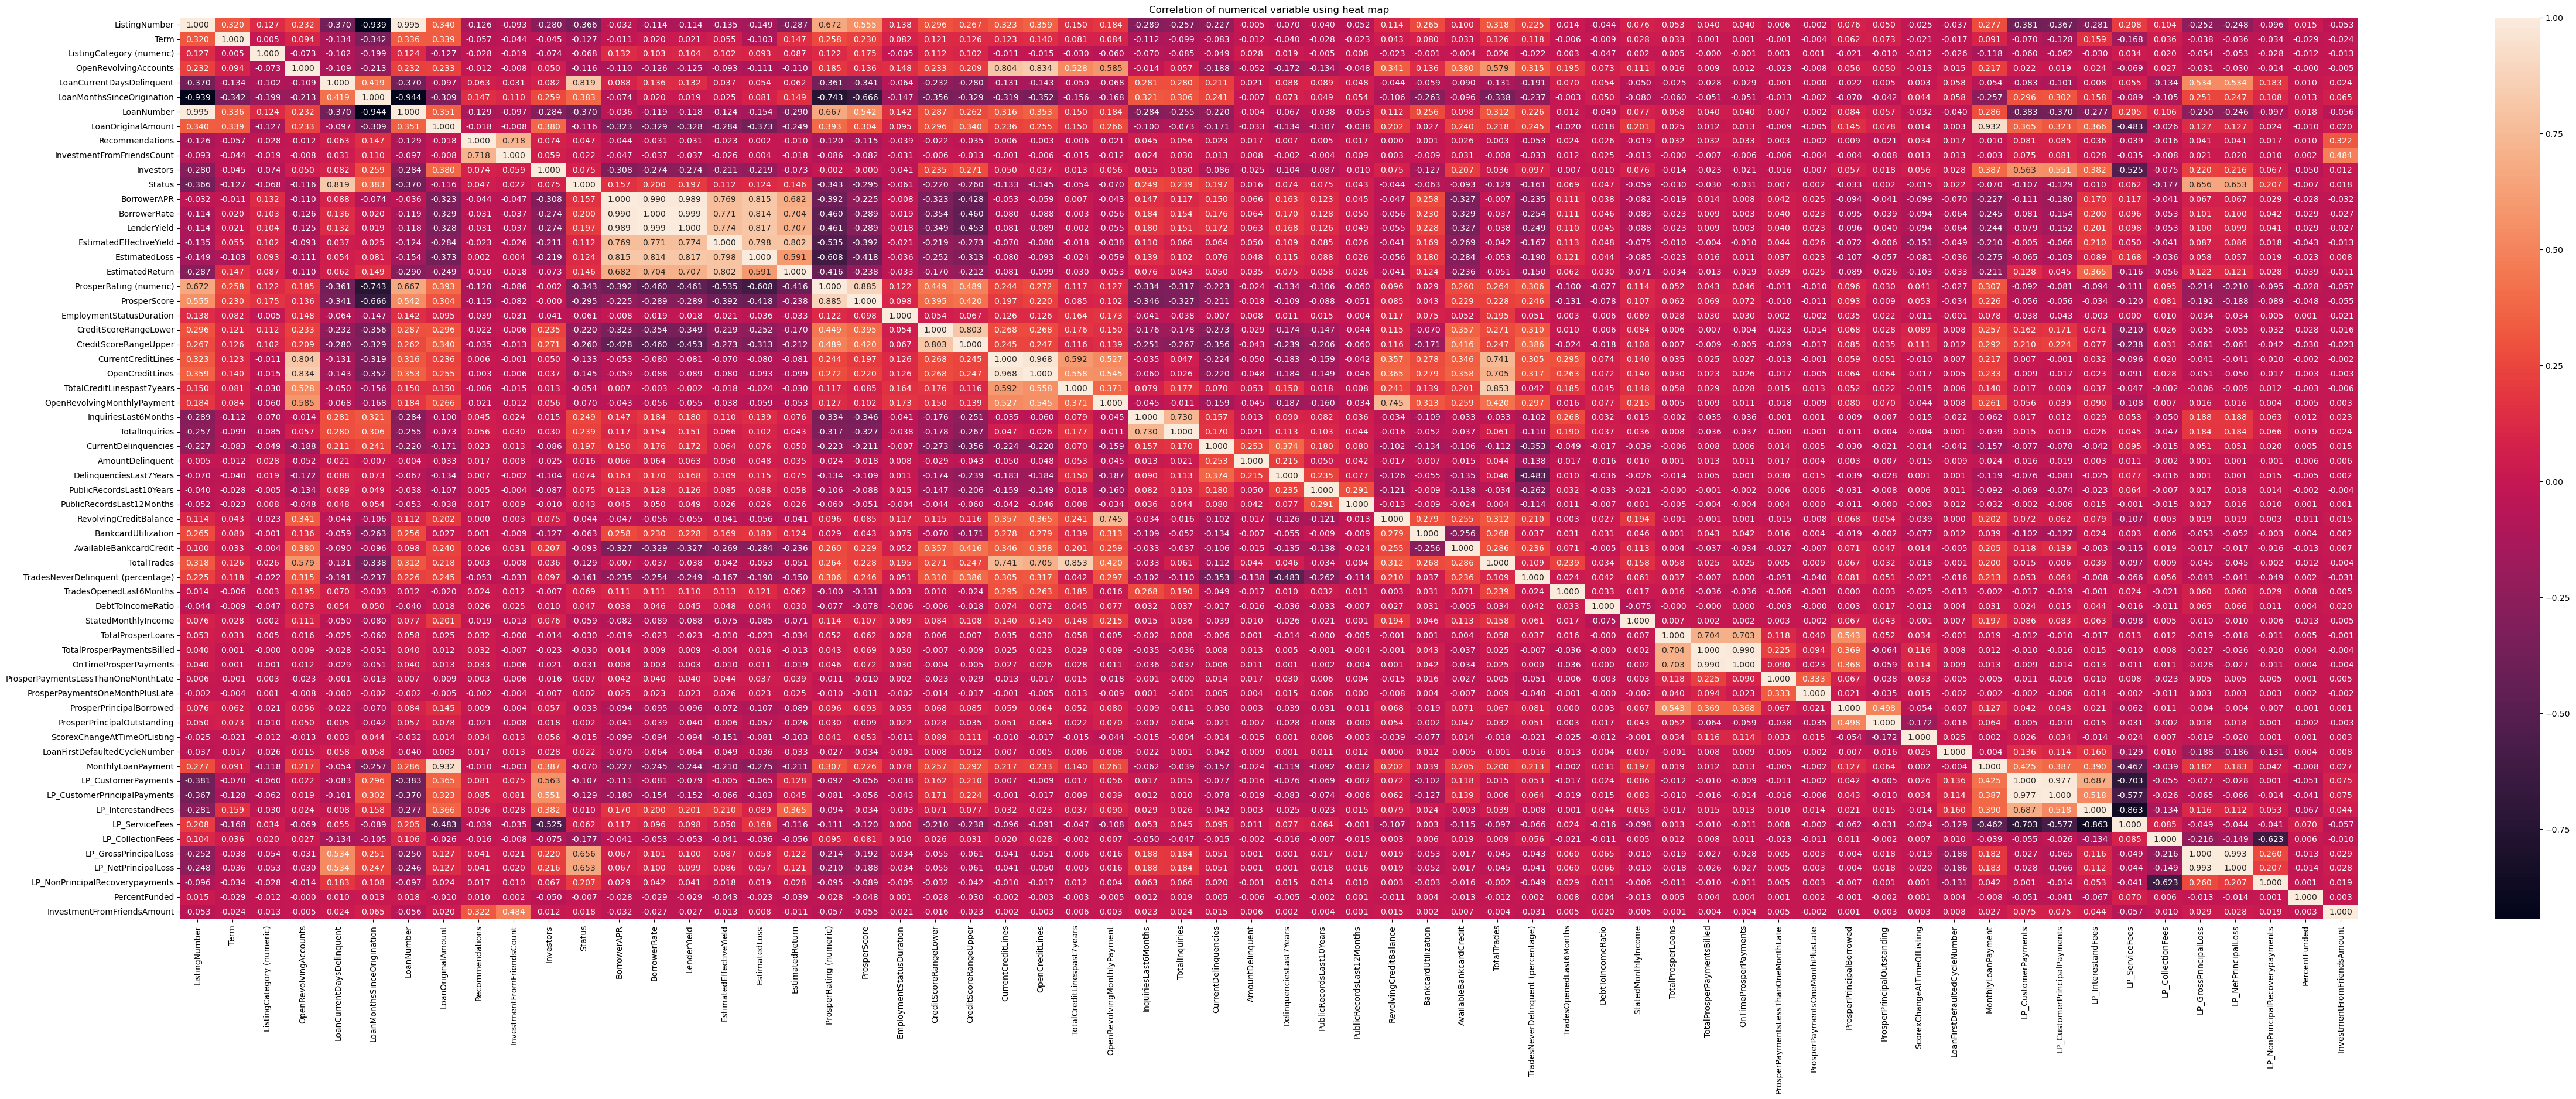

In [59]:
plt.figure(figsize=(60,20))
sns.heatmap(data=data_viz.corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variable using heat map');

### What are the most number of borrowers Credit Grade?.

not available    84984
C                 5649
D                 5153
B                 4389
AA                3509
HR                3508
A                 3315
E                 3289
NC                 141
Name: CreditGrade, dtype: int64

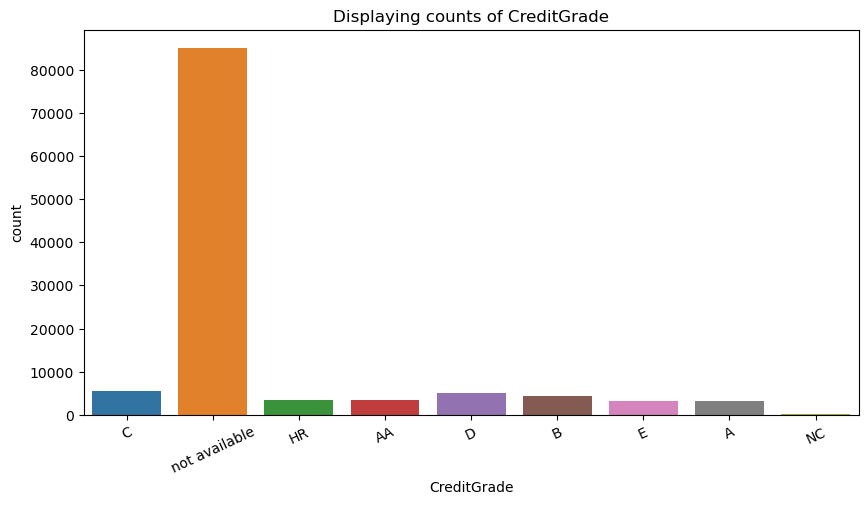

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x='CreditGrade',data=data_viz)
plt.xticks(rotation=25)
plt.title('Displaying counts of CreditGrade');

data_viz['CreditGrade'].value_counts()

- The Most Number of Borrowers CreditGrade is C.

## Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [61]:
credit_c_and_d = data_viz[data_viz['CreditGrade'].isin(['C', 'D'])]
credit_c_and_d

CreditGrade  LoanStatus ProsperRating (Alpha) BorrowerState  \
0                C   Completed         not available            CO   
11               C   Completed         not available            CA   
21               D   Completed         not available            MI   
46               C   Completed         not available            IL   
59               C   Completed         not available            IL   
...            ...         ...                   ...           ...   
113880           C   Completed         not available            GA   
113890           C   Completed         not available            GA   
113904           C  Chargedoff         not available            WA   
113915           D   Completed         not available            MA   
113922           C   Completed         not available            GA   

                 Occupation EmploymentStatus     IncomeRange  ListingNumber  \
0                     Other    Self-employed  $25,000-49,999         193129   
11          Waiter/Waitress        Full-time       $1-24,999         213551   
21             Professional        Full-time  $25,000-49,999         241498   
46           Accountant/CPA        Full-time  $25,000-49,999         378497   
59                    Other        Full-time  $25,000-49,999         203384   
...                     ...              ...             ...            ...   
113880         Professional        Full-time  $25,000-49,999         156978   
113890  Computer Programmer        Full-time  $25,000-49,999         182018   
113904          Nurse (LPN)        Full-time  $50,000-74,999         218555   
113915                Other        Full-time  $50,000-74,999         374730   
113922                Other        Full-time  $50,000-74,999         379986   

        Term  ListingCategory (numeric)  ...  LP_CustomerPrincipalPayments  \
0         36                          0  ...                       9425.00   
11        36                          0  ...                       1000.00   
21        36                          0  ...                       3000.00   
46        36                          1  ...                       4000.00   
59        36                          0  ...                       6999.80   
...      ...                        ...  ...                           ...   
113880    36                          0  ...                       4800.00   
113890    36                          0  ...                      10000.00   
113904    36                          0  ...                       3317.24   
113915    36                          7  ...                       2999.98   
113922    36                          5  ...                       4999.98   

        LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0                  1971.14         -133.18               0.00   
11                   11.65           -0.88               0.00   
21                 1061.05          -51.12               0.00   
46                  667.64          -44.51               0.00   
59                 1861.43         -116.33               0.00   
...                    ...             ...                ...   
113880             1093.90          -79.55               0.00   
113890             2441.33         -165.51               0.00   
113904             2567.71         -106.99             -28.51   
113915             1064.13          -51.71             -37.64   
113922             1061.29          -81.95               0.00   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                        0.00                 0.00   
11                       0.00                 0.00   
21                       0.00                 0.00   
46                       0.00                 0.00   
59                       0.00                 0.00   
...                       ...                  ...   
113880                   0.00                 0.00   
113890                   0.00                 0.00   
113904       

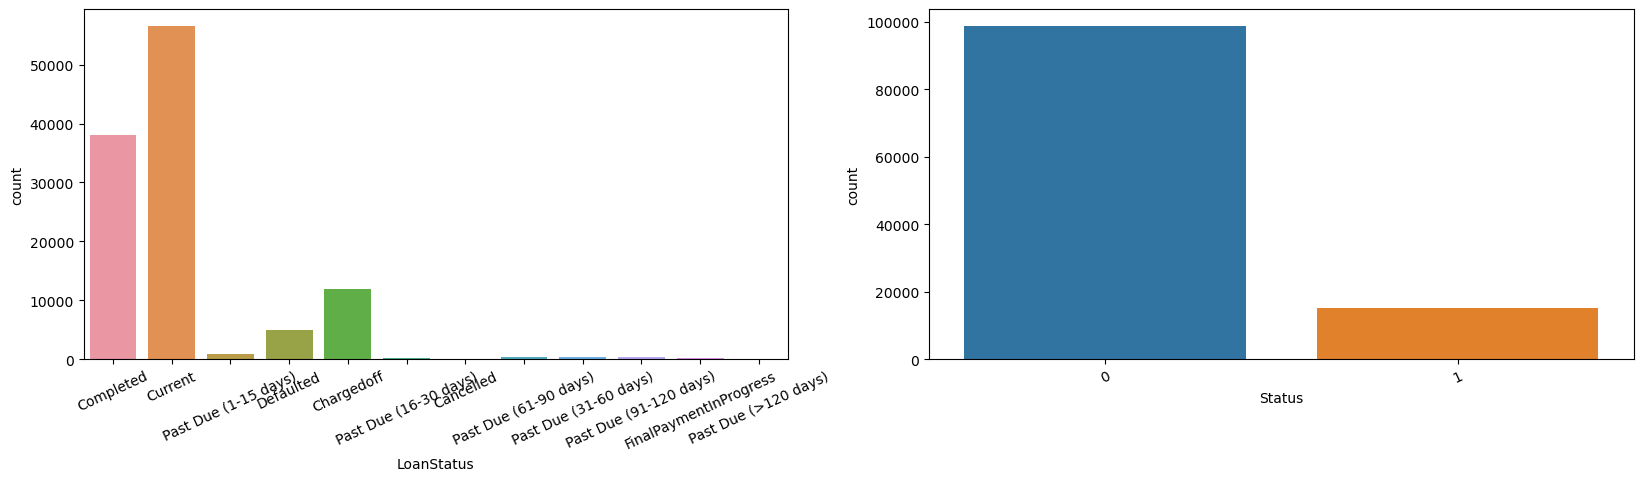

In [62]:
columns=['LoanStatus','Status']

plt.figure(figsize=(20,10))

for i,j in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data_viz[j])
    plt.xticks(rotation=25)

- Low Credit Grade such as C and D ,doesn't lead to a higher amount of deliquency.

## What is the highest number of BorrowerRate?

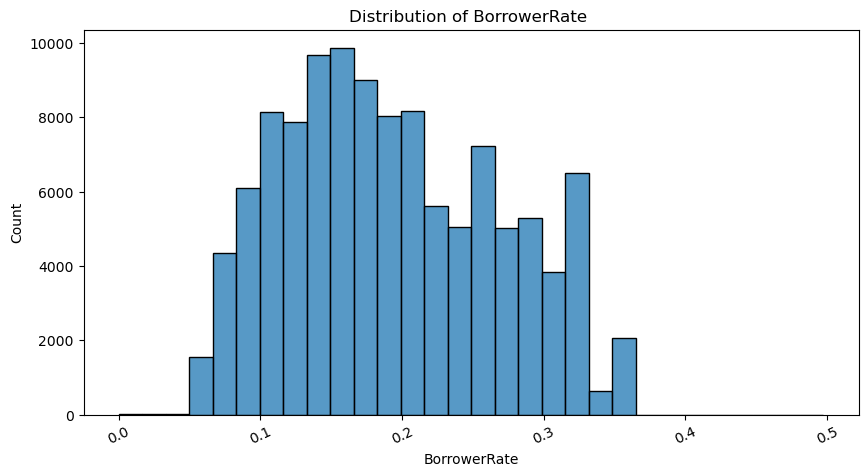

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(data_viz['BorrowerRate'],bins=30,kde=False)
plt.xticks(rotation=25)
plt.title('Distribution of BorrowerRate ');

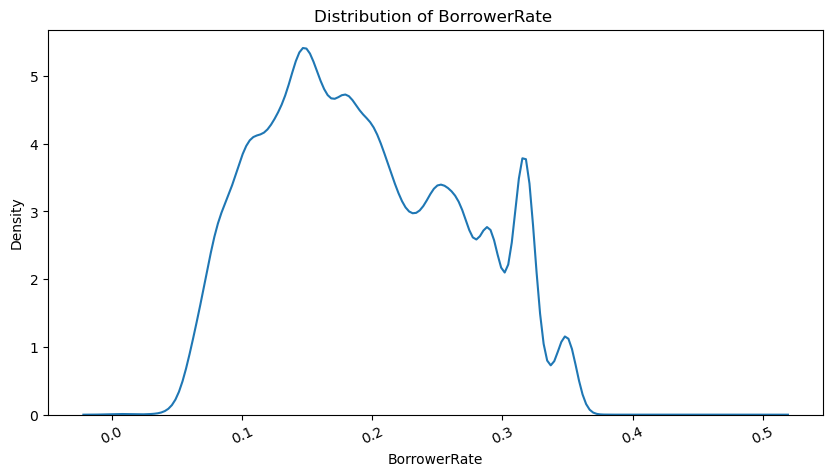

In [64]:
plt.figure(figsize=(10,5))
sns.kdeplot(data_viz['BorrowerRate'])
plt.xticks(rotation=25)
plt.title('Distribution of BorrowerRate ');

- The Most of the borrowerrate range from 0.1 to 0.2 

## Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

In [65]:
lender_yield = data_viz[(data_viz['BorrowerRate'] >= 0.1) & (data_viz['BorrowerRate'] <= 0.2)] 
lender_yield

CreditGrade              LoanStatus ProsperRating (Alpha)  \
0                   C               Completed         not available   
5       not available                 Current                     B   
11                  C               Completed         not available   
12      not available    Past Due (1-15 days)                     B   
13      not available                 Current                     A   
...               ...                     ...                   ...   
113930  not available                 Current                     B   
113931  not available                 Current                     B   
113932  not available                 Current                     C   
113933  not available  FinalPaymentInProgress                     A   
113936  not available                 Current                     A   

       BorrowerState               Occupation EmploymentStatus  \
0                 CO                    Other    Self-employed   
5                 NM             Professional         Employed   
11                CA          Waiter/Waitress        Full-time   
12                AL           Sales - Retail         Employed   
13                AZ             Construction         Employed   
...              ...                      ...              ...   
113930            IN             Professional         Employed   
113931            IL                  Analyst         Employed   
113932            IL  Food Service Management         Employed   
113933            PA             Professional         Employed   
113936            NY                Professor         Employed   

           IncomeRange  ListingNumber  Term  ListingCategory (numeric)  ...  \
0       $25,000-49,999         193129    36                          0  ...   
5            $100,000+        1074836    60                          1  ...   
11           $1-24,999         213551    36                          0  ...   
12      $25,000-49,999        1081604    36                          1  ...   
13      $50,000-74,999         840820    36                          1  ...   
...                ...            ...   ...                        ...  ...   
113930  $75,000-99,999         831523    36                          1  ...   
113931  $75,000-99,999        1141292    60                          3  ...   
113932  $50,000-74,999         753087    36                          1  ...   
113933  $75,000-99,999         537216    36                          7  ...   
113936  $50,000-74,999        1140093    36                          1  ...   

        LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  \
0                            9425.00           1971.1400         -133.18   
5                             351.89            327.4500          -25.33   
11                           1000.00             11.6500           -0.88   
12                             88.64             47.1774           -3.40   
13                           1449.41            480.0000          -46.42   
...                              ...                 ...             ...   
113930                        471.89            270.4600          -16.51   
113931                        294.99            261.7840          -21.23   
113932                       2238.38           1409.0200          -75.58   
113933                       1997.16            333.3900          -30.05   
113936                         47.25             17.0807           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
5                     0.0                    0.0                  0.0   
11                    0.0                    0.0                  0.0   
12                    0.0                    0.0                  0.0   
13                    0.0                    0.0                  0.0   
...                   ...                    ...                

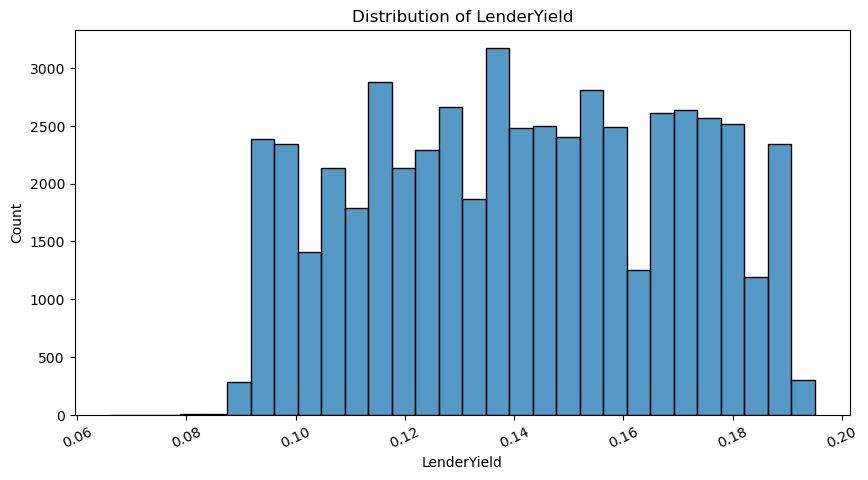

In [66]:
plt.figure(figsize=(10,5))
sns.histplot(lender_yield['LenderYield'],bins=30,kde=False)
plt.xticks(rotation=25)
plt.title('Distribution of LenderYield');

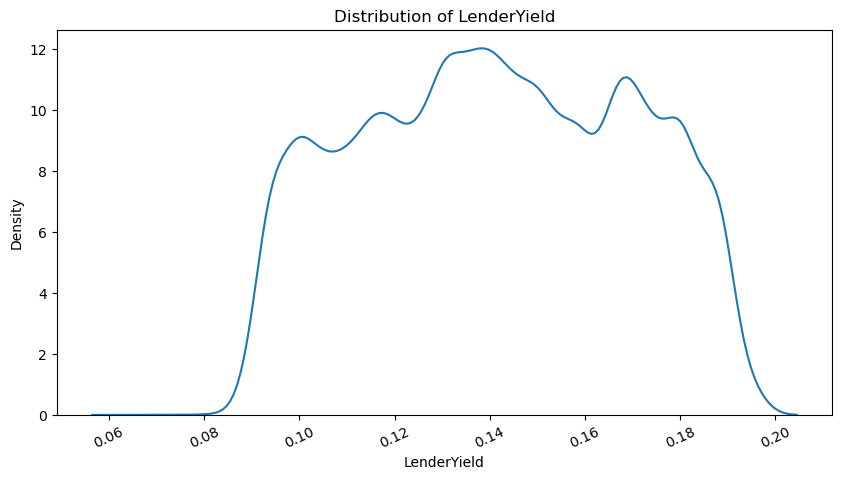

In [67]:
plt.figure(figsize=(10,5))
sns.kdeplot(lender_yield['LenderYield'])
plt.xticks(rotation=25)
plt.title('Distribution of LenderYield');

- The highest number of Borrower Rate is between 0.1 and 0.2, and the highest number of Lender Yield is  also between 0.1 and 0.2.

## Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

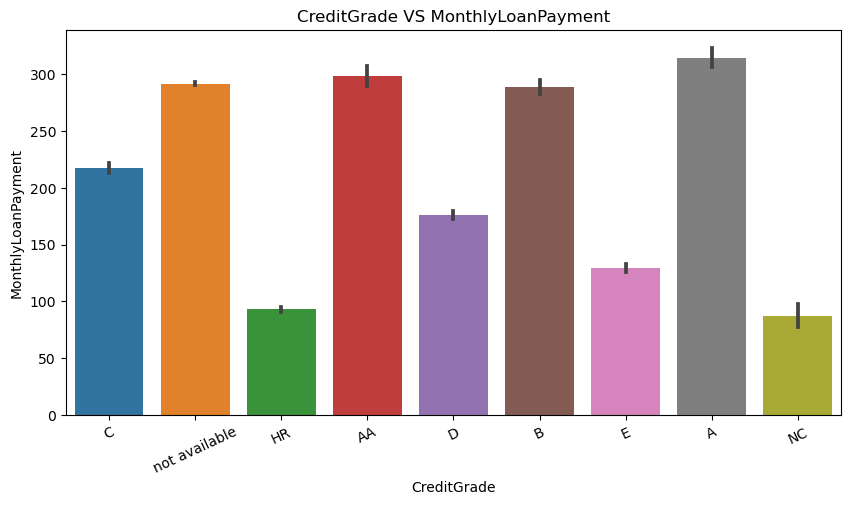

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x='CreditGrade',y='MonthlyLoanPayment',data=data_viz)
plt.xticks(rotation=25)
plt.title('CreditGrade VS MonthlyLoanPayment')
plt.show()

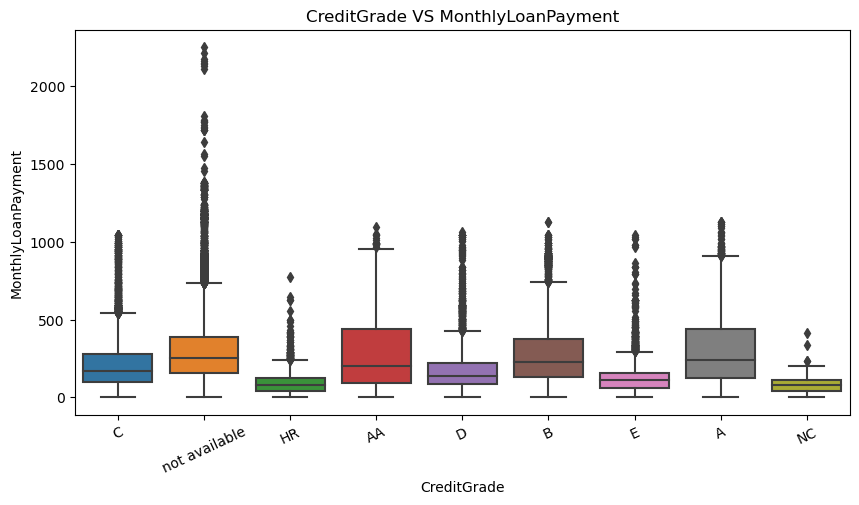

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CreditGrade',y='MonthlyLoanPayment',data=data_viz)
plt.xticks(rotation=25)
plt.title('CreditGrade VS MonthlyLoanPayment')
plt.show()

- The AA to B paying higher monthly loan payment.

## Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

In [70]:
credit_grade = data_viz[data_viz['CreditGrade'] != "not available"]
credit_grade

CreditGrade  LoanStatus ProsperRating (Alpha) BorrowerState  \
0                C   Completed         not available            CO   
2               HR   Completed         not available            GA   
11               C   Completed         not available            CA   
17              AA  Chargedoff         not available            CA   
21               D   Completed         not available            MI   
...            ...         ...                   ...           ...   
113921          AA   Completed         not available            CA   
113922           C   Completed         not available            GA   
113923           B   Completed         not available            MS   
113926           E   Defaulted         not available            CA   
113927          AA   Completed         not available            WA   

             Occupation EmploymentStatus     IncomeRange  ListingNumber  Term  \
0                 Other    Self-employed  $25,000-49,999         193129    36   
2                 Other    Not available   Not displayed          81716    36   
11      Waiter/Waitress        Full-time       $1-24,999         213551    36   
17         Professional    Not available   Not displayed          31540    36   
21         Professional        Full-time  $25,000-49,999         241498    36   
...                 ...              ...             ...            ...   ...   
113921            Other         Employed   Not displayed              4    36   
113922            Other        Full-time  $50,000-74,999         379986    36   
113923           Clergy        Full-time  $25,000-49,999         395877    36   
113926            Other    Not available   Not displayed          28121    36   
113927        Executive        Full-time       $100,000+         322787    36   

        ListingCategory (numeric)  ...  LP_CustomerPrincipalPayments  \
0                               0  ...                       9425.00   
2                               0  ...                       3001.00   
11                              0  ...                       1000.00   
17                              0  ...                       3987.33   
21                              0  ...                       3000.00   
...                           ...  ...                           ...   
113921                          0  ...                       1000.00   
113922                          5  ...                       4999.98   
113923                          1  ...                       7999.99   
113926                          0  ...                        463.90   
113927                          4  ...                       4291.99   

        LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0                  1971.14         -133.18                0.0   
2                  1185.63          -24.20                0.0   
11                   11.65           -0.88                0.0   
17                 1338.00          -54.61                0.0   
21                 1061.05          -51.12                0.0   
...                    ...             ...                ...   
113921                0.89           -0.88                0.0   
113922             1061.29          -81.95                0.0   
113923             2830.40         -135.50                0.0   
113926              541.86           -9.34                0.0   
113927              464.93          -68.47                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                        0.00                 0.00   
2                        0.00                 0.00   
11                       0.00                 0.00   
17                    6012.65              6012.67   
21                       0.00                 0.00   
...                       ...                  ...   
113921                   0.00                 0.00   
113922                   0.00                 0.00   
113923                   0.00                 0.00   
113926 

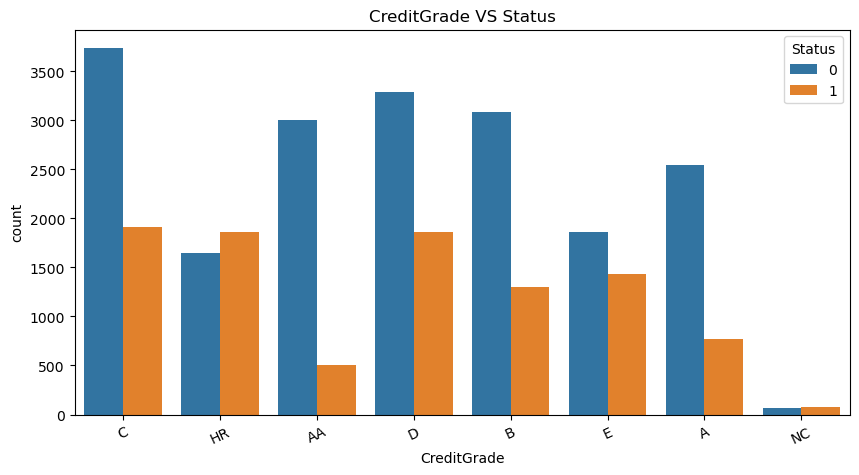

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='CreditGrade',data=credit_grade,hue='Status',)
plt.xticks(rotation=25)
plt.title('CreditGrade VS Status')
plt.show()

- The completed loan status is accurate for all the CreditGrade.

### Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

In [72]:
prosper_score = data_viz[data_viz['ProsperScore'] != "not available"]
prosper_score

CreditGrade              LoanStatus ProsperRating (Alpha)  \
0                   C               Completed         not available   
1       not available                 Current                     A   
2                  HR               Completed         not available   
3       not available                 Current                     A   
4       not available                 Current                     D   
...               ...                     ...                   ...   
113932  not available                 Current                     C   
113933  not available  FinalPaymentInProgress                     A   
113934  not available                 Current                     D   
113935  not available               Completed                     C   
113936  not available                 Current                     A   

       BorrowerState               Occupation EmploymentStatus  \
0                 CO                    Other    Self-employed   
1                 CO             Professional         Employed   
2                 GA                    Other    Not available   
3                 GA            Skilled Labor         Employed   
4                 MN                Executive         Employed   
...              ...                      ...              ...   
113932            IL  Food Service Management         Employed   
113933            PA             Professional         Employed   
113934            TX                    Other         Employed   
113935            GA             Food Service        Full-time   
113936            NY                Professor         Employed   

           IncomeRange  ListingNumber  Term  ListingCategory (numeric)  ...  \
0       $25,000-49,999         193129    36                          0  ...   
1       $50,000-74,999        1209647    36                          2  ...   
2        Not displayed          81716    36                          0  ...   
3       $25,000-49,999         658116    36                         16  ...   
4            $100,000+         909464    36                          2  ...   
...                ...            ...   ...                        ...  ...   
113932  $50,000-74,999         753087    36                          1  ...   
113933  $75,000-99,999         537216    36                          7  ...   
113934  $25,000-49,999        1069178    60                          1  ...   
113935  $25,000-49,999         539056    60                          2  ...   
113936  $50,000-74,999        1140093    36                          1  ...   

        LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  \
0                            9425.00           1971.1400         -133.18   
1                               0.00              0.0000            0.00   
2                            3001.00           1185.6300          -24.20   
3                            4091.09           1052.1100         -108.01   
4                            1563.22           1256.6300          -60.27   
...                              ...                 ...             ...   
113932                       2238.38           1409.0200          -75.58   
113933                       1997.16            333.3900          -30.05   
113934                        183.15            363.5500          -16.91   
113935                      15000.00           6122.5600         -235.05   
113936                         47.25             17.0807           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                     0.0                    0.0                  0.0   
1                     0.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     0.0                    0.0                  0.0   
...                   ...                    ...                

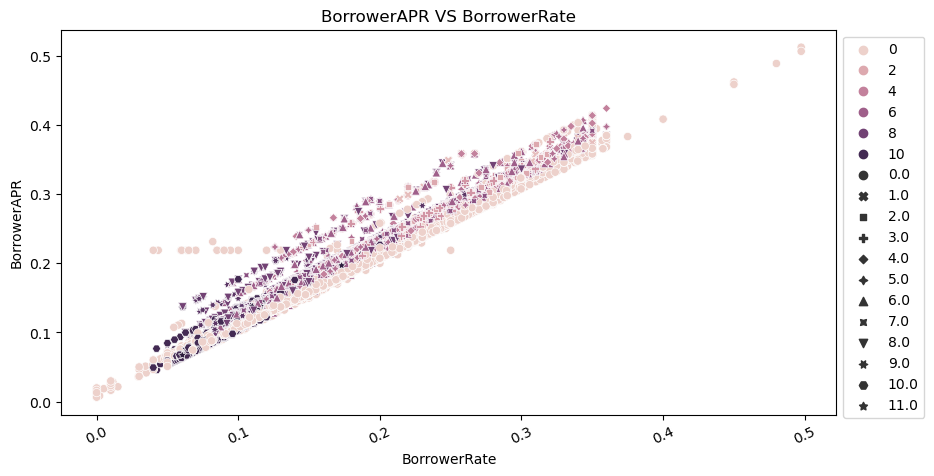

In [73]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='BorrowerRate',y='BorrowerAPR',hue='ProsperScore',style='ProsperScore',data=prosper_score)
ax.legend(loc=0,bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=25)
plt.title('BorrowerAPR VS BorrowerRate');

- The BorrowerRate and BorrowerApr is less who maintaining good prosperscore.
- The prosperscore for 7,8,9,10,11 having less BorrowerRate and less BorrowerApr.

In [74]:
data.to_csv("prosper_loan_data.csv",index=False)